In [ ]:
# 
# Under the life cycle savings hypothesis as developed by Franco Modigliani, the savings  ratio 
# (aggregate personal savings divided by disposable income) is explained by per-capita  disposable 
# income, the percentage rate of change in per-capita disposable income, and two  demographic 
# variables: the percentage of population less than 15 years old and the percentage of the 
# population over 75 years old. The data is averaged over the decade 1960–1970  to remove the 
# business cycle or other short-term fluctuations. The following data were obtained from Belsley, Kuh, 
# and Welsch (1980).3 They in turn  obtained the data from Sterling (1977).4 You can download it from 
# OA 7.4.  The dataset contains 50 observations with five variables: 
#     
#     • Sr: numeric, aggregate personal savings  
#     • pop15: numeric, percentage of population under 15  
#     • pop75: numeric, percentage of population over 75  
#     • dpi: numeric, real per-capita disposable income  
#     • ddpi: numeric, percentage growth rate of dpi.  
# 
# Use a clustering algorithm (agglomerative and/or divisive) to identify the similar countries. 
# 

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('../Datasets/Code_and_Data_(Chapter_07)/Code and Data (Chapter 07)/lifecyclesaving.csv')

# Isolate feature set and target variable
X = df.drop(columns='Contry')
y = df.Contry

# Inspect shape of X to see it currently has 5 features
print(f"\nShape of X: {X.shape} \n")


Shape of X: (50, 5) 



[0 0 0 2 2 1 2 2 2 2 0 2 0 0 0 2 2 2 0 2 0 0 0 2 0 2 0 0 0 2 2 2 2 2 2 2 2
 2 1 0 2 2 0 1 2 2 2 2 2 2]


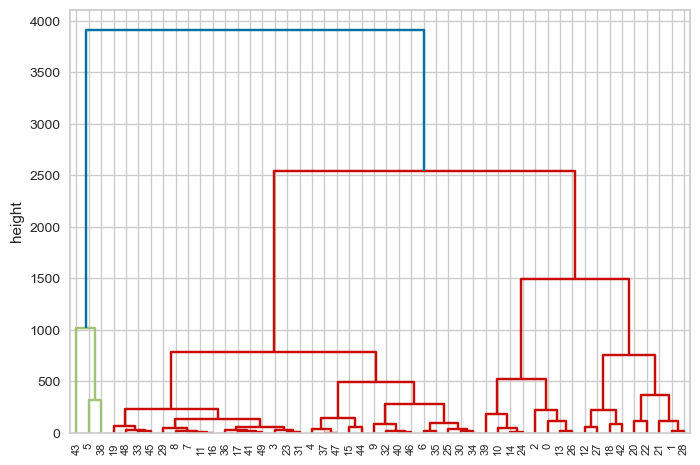

In [56]:
# Standardize X since PCA is sensitive to scale
scaler = StandardScaler()
scaler = scaler.fit_transform(X)

# Create the linkage matrix to plot the dendrogram and visualize clustering
linkage_matrix = sch.linkage(X, method='complete')
dendrogram = sch.dendrogram(linkage_matrix)
plt.ylabel('height')
plt.savefig('dendrogram.png', dpi=300)

# Create the clustering model and fit it to X
n = 3
cluster = AgglomerativeClustering(n_clusters=n, linkage='complete')
cluster_preds = cluster.fit_predict(X)

# Print the predictions
print (cluster_preds)

The average silhouette_score is : 0.6739598072436485


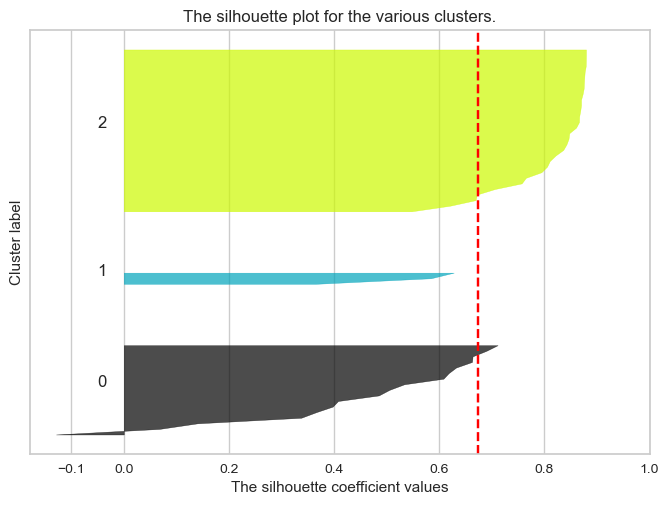

In [59]:
# Here I did some research and found how to generate a silhouette model,
# which is one of the only ways to visualize the accuracy of a clustering 
# model such as agglomerative clustering.
#
# The silhouette score indicates how well the point is assigned to its cluster
# with a score closer to 1 being best.

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg = silhouette_score(X, cluster_preds)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_preds)

y_lower = 10
for i in range(n):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_preds == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([]) 
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# View the average silhouette score
print("The average silhouette_score is :", silhouette_avg)

# View the plot
plt.show()